<a href="https://colab.research.google.com/github/FayeValentain/it-cert-automation-practice/blob/master/05_Python_Multimedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R, PYTHON AND JULIA: DO YOU KNOW THEM ALL?

## ICON-Institute
Online webinar

2024 - March 11, 13, 15

### [Dr. Christian Kauth](https://www.linkedin.com/in/ckauth/)

# Multimedia

Day 1/3 - Part 5

# Image Data 🖼️

## Webcam Access

### JS Code

In [ ]:
from IPython.display import display, Javascript

def video_stream():
  js = Javascript('''

    var div;
    var video_original;
    var image_meshed;
    var stream;
    var is_stopped = false;

    async function startVideoStream() {
      div = document.createElement('div');
      const button_stop = document.createElement('button');
      button_stop.textContent = 'Stop';
      button_stop.addEventListener("click", function() {
        stopVideoStream();
      });

      video_original = document.createElement('video');
      stream = await navigator.mediaDevices.getUserMedia({video: true});
      video_original.srcObject = stream;

      image_meshed = document.createElement('img');

      document.body.appendChild(div);
      div.appendChild(button_stop);
      div.appendChild(video_original);
      div.appendChild(image_meshed);

      await video_original.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
    }

    async function stopVideoStream() {
      stream.getTracks().forEach(function(track) {
        track.stop();
      });
      //div.remove();
      is_stopped = true;
    }

    async function getFrame(quality=0.8) {
      if (is_stopped) {
        return '';
      }
      const canvas = document.createElement('canvas');
      canvas.width = video_original.videoWidth;
      canvas.height = video_original.videoHeight;
      canvas.getContext('2d').drawImage(video_original, 0, 0);
      return canvas.toDataURL('image/jpeg', quality);
    }

    async function setFrame(frame_js) {
      image_meshed.src = frame_js
    }

    ''')
  display(js)

### Python Code

In [ ]:
from google.colab.output import eval_js

from base64 import b64decode, b64encode
import numpy as np
import cv2

def start_video_stream():
  eval_js('startVideoStream()')

def stop_video_stream():
  eval_js('stopVideoStream()')

def get_frame():
  frame_js = eval_js('getFrame()')
  # decode base64 image
  image_bytes = b64decode(frame_js.split(',')[1])
  # convert bytes to numpy array
  img_array = np.frombuffer(image_bytes, dtype=np.uint8)
  # convert numpy array into OpenCV BGR
  frame = cv2.imdecode(img_array, flags=1)
  return frame

def set_frame(frame):
  _, img_array = cv2.imencode('.jpeg', frame)
  image_bytes = np.array(img_array).tobytes()
  frame_js = "data:image/jpeg;base64," + b64encode(image_bytes).decode("utf-8")
  eval_js(f'setFrame("{frame_js}")')

## Face Mesh
from [Google's MediaPipe](https://developers.google.com/mediapipe/solutions/vision/face_landmarker/)

In [ ]:
!pip install -q mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.8/34.8 MB 25.7 MB/s eta 0:00:00


In [ ]:
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

with mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as face_mesh:

  video_stream()
  start_video_stream()

  while True:
    try:
      image = get_frame()

      # To improve performance, optionally mark the image as not writeable to
      # pass by reference.
      image.flags.writeable = False
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

      results = face_mesh.process(image)

      # Draw the face mesh annotations on the image.
      image.flags.writeable = True
      image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

      if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
          mp_drawing.draw_landmarks(
              image=image,
              landmark_list=face_landmarks,
              connections=mp_face_mesh.FACEMESH_TESSELATION,
              landmark_drawing_spec=None,
              connection_drawing_spec=mp_drawing_styles
              .get_default_face_mesh_tesselation_style())
          mp_drawing.draw_landmarks(
              image=image,
              landmark_list=face_landmarks,
              connections=mp_face_mesh.FACEMESH_CONTOURS,
              landmark_drawing_spec=None,
              connection_drawing_spec=mp_drawing_styles
              .get_default_face_mesh_contours_style())
          mp_drawing.draw_landmarks(
              image=image,
              landmark_list=face_landmarks,
              connections=mp_face_mesh.FACEMESH_IRISES,
              landmark_drawing_spec=None,
              connection_drawing_spec=mp_drawing_styles
              .get_default_face_mesh_iris_connections_style())
      # Flip the image horizontally for a selfie-view display.
      set_frame(image)

    except:
      break

<IPython.core.display.Javascript object>

# Text Data ✍🏻

## Webscraping

for more on Webscraping, visit the [Privately Held Data - Tools & Techniques](https://cros-legacy.ec.europa.eu/content/privately-held-data-%E2%80%93-tools-and-techniques-second-edition-2023_en) training.


In [ ]:
import requests

url = "https://ec.europa.eu/eurostat/web/products-eurostat-news/w/ddn-20240305-1"
res = requests.get(url)
print(res.status_code)
res.text

200


'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\t\n\t\t\n\t\t\t<!DOCTYPE html>\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n    \n\n\n\n\n<html dir="ltr" lang="en-GB">\n\n<head>\n    <title>General government expenditure by function in 2022 - Eurostat</title>\n    <meta content="initial-scale=1.0, width=device-width" name="viewport" />\n    <link rel="stylesheet" href="https://ec.europa.eu/eurostat/o/estat-theme-ecl/css/ecl-eu.css?browserId=other&amp;themeId=estatthemeecl_WAR_estatthemeecl&amp;minifierType=none&amp;languageId=en_GB&amp;t=1707912738000">\n    <link rel="stylesheet" media="print" href="https://ec.europa.eu/eurostat/o/estat-theme-ecl/css/ecl-eu-print.css?browserId=other&amp;themeId=estatthemeecl_WAR_estatthemeecl&amp;minifierType=none&amp;languageId=en_GB&amp;t=1707912738000">\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<meta content="text/html;

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(res.text, 'html.parser')
eurostat_news = "\n".join([p.text
                           for div in soup.find_all('div' , {'class': 'publication-web-content'})
                           for p in div.find_all('p')
                           if len(p.text) > 5])

print(eurostat_news)

In 2022, the general government total expenditure in the EU amounted to 49.6% of gross domestic product (GDP). It was still influenced by the government measures aimed at mitigating COVID-19 pandemic effects, although to a lesser extent than in 2020 and 2021. On the other hand, government measures to mitigate the impact of increasing energy prices strongly influenced the level and composition of government expenditure. The decrease in the ratio to GDP compared with the previous year (51.3%) was mainly a consequence of increases in GDP, while growth in total expenditure was still observed (€7 894 billion in 2022 compared with €7 516 billion in 2021; an increase of €377 billion and a growth of 5.0% compared with 2021).
This information comes from recently published data on general government expenditure by function. This article presents only a handful of findings from the more detailed set of Statistics Explained articles.
Among the main functions of general government expenditure in th

## ChatGPT

Your soon favorite assistant for coding 😉

https://chat.openai.com/chat

In [ ]:
!pip install -qq openai llmx typing_extensions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.4/227.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.2 MB/s eta 0:00:00


In [ ]:
# OPENAI_API_KEY = "sk-..."         # https://platform.openai.com/account/api-keys
from google.colab import userdata
from openai import OpenAI
from pprint import pprint

openai_client = OpenAI(api_key=userdata.get("OPENAI_API_KEY"))

In [ ]:
def ask_chatGPT(messages, max_tokens=256):
  response = openai_client.chat.completions.create(
    model="gpt-3.5-turbo-0125",
    messages = messages,
    temperature=0.0,
    max_tokens=max_tokens,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0
  )

  return response

### ChatGPT's Opinion

In [ ]:
response = ask_chatGPT([{"role": "system", "content": "You are a helpful assistant."},
                        {"role": "user", "content": f"Context:\n```{eurostat_news}```\n\nOn what do EU countries spend their money?"}
                        ],
                       max_tokens=2048)

answer = response.choices[0].message.content
print(answer)

EU countries spend their money on various areas through general government expenditure. Some of the main functions of general government expenditure in the EU include:

1. Social Protection: This is the most important area of expenditure, equivalent to 19.5% of GDP in 2022. It includes programs such as pensions, unemployment benefits, and social assistance.

2. Health: Health expenditure accounted for 7.7% of GDP in 2022. It covers healthcare services, public health programs, and medical research.

3. General Public Services: This category includes activities like external affairs and public debt transactions, and it represented 6.0% of GDP in 2022.

4. Economic Affairs: Expenditure on economic affairs, which includes areas like infrastructure development and economic policy, accounted for 5.9% of GDP.

5. Education: Education expenditure accounted for 4.7% of GDP in 2022 and covers spending on schools, universities, and training programs.

6. Public Order and Safety: This function rep

### ChatGPT's Graph

In [ ]:
response = ask_chatGPT([{"role": "system", "content": "You are a helpful programming assistent that generates Python code."},
                        {"role": "user", "content": f"Context:```{eurostat_news}```\n\nPlace the expenditures into a pandas dataframe and generate a meaningful plot"}
                        ],
                       max_tokens=1024)

answer = response.choices[0].message.content
answer

"```python\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\n# Data for general government expenditure by function\ndata = {\n    'Function': ['Social Protection', 'Health', 'General Public Services', 'Economic Affairs', 'Education', \n                 'Public Order and Safety', 'Defence', 'Recreation, Culture and Religion', 'Housing and Community Amenities', 'Environmental Protection'],\n    'Expenditure_GDP_Ratio': [19.5, 7.7, 6.0, 5.9, 4.7, 1.7, 1.3, 1.1, 1.0, 0.8]\n}\n\n# Create a pandas DataFrame\ndf = pd.DataFrame(data)\n\n# Plotting the data\nplt.figure(figsize=(12, 6))\nplt.barh(df['Function'], df['Expenditure_GDP_Ratio'], color='skyblue')\nplt.xlabel('Expenditure as % of GDP')\nplt.ylabel('Function')\nplt.title('General Government Expenditure by Function in the EU (2022)')\nplt.gca().invert_yaxis()  # Invert y-axis to show the highest expenditure at the top\nplt.show()\n```"

## Regular Expression

In [ ]:
import re

def extract_code(text):
  pattern = r"```python([\s\S]+?)```"
  #pattern = r"```([\s\S]+?)```"
  matches = re.findall(pattern, text)

  return "\n".join(matches)

In [ ]:
code = extract_code(answer)
print(code)


import pandas as pd
import matplotlib.pyplot as plt

# Data for general government expenditure by function
data = {
    'Function': ['Social Protection', 'Health', 'General Public Services', 'Economic Affairs', 'Education', 
                 'Public Order and Safety', 'Defence', 'Recreation, Culture and Religion', 'Housing and Community Amenities', 'Environmental Protection'],
    'Expenditure_GDP_Ratio': [19.5, 7.7, 6.0, 5.9, 4.7, 1.7, 1.3, 1.1, 1.0, 0.8]
}

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Plotting the data
plt.figure(figsize=(12, 6))
plt.barh(df['Function'], df['Expenditure_GDP_Ratio'], color='skyblue')
plt.xlabel('Expenditure as % of GDP')
plt.ylabel('Function')
plt.title('General Government Expenditure by Function in the EU (2022)')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest expenditure at the top
plt.show()



## Running the Code

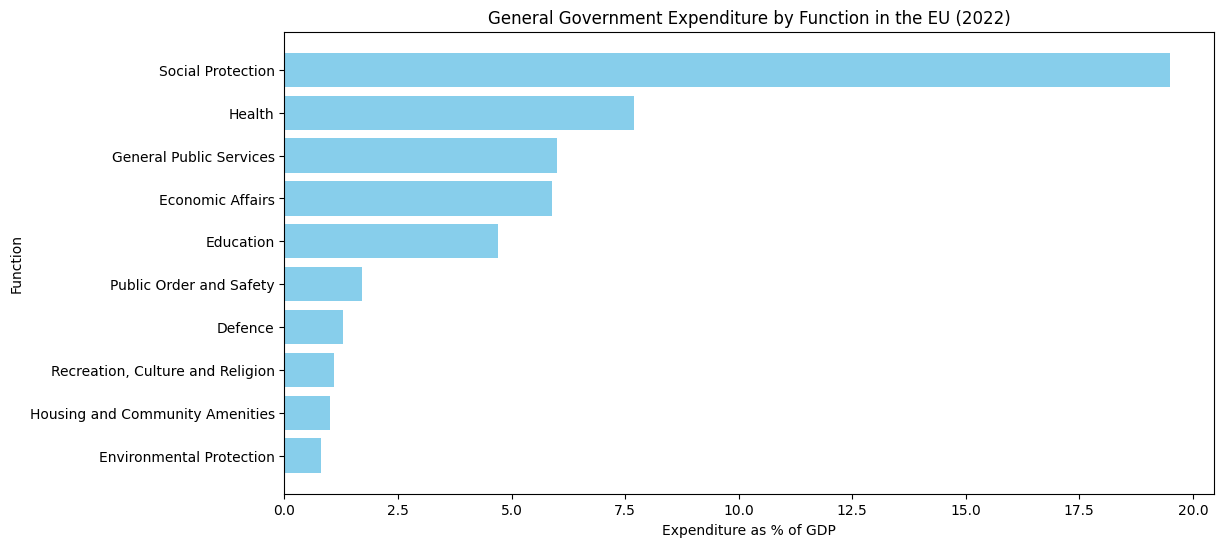

In [ ]:
try:
  exec(code)
except Exception as e:
  print(f"Code failed with Exception {e}")

# Voice Data 🗣️

## Gradio

In [ ]:
%%html
<iframe src="https://gradio.app/" width="1000px" height="600px"/>

In [ ]:
!pip install -qq gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.9/307.9 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.9 MB/s eta 0:00:00


In [ ]:
import gradio
gradio.__version__

'4.19.2'

## Whisper

Has been trained on a human life-span of music (680k hours). [Read more...](https://openai.com/research/whisper)

In [ ]:
!pip install -q git+https://github.com/openai/whisper.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import whisper

model = whisper.load_model("small")

100%|███████████████████████████████████████| 461M/461M [00:06<00:00, 72.4MiB/s]


In [ ]:
import gradio as gr
import io
import soundfile as sf

def transcribe(audio):
  audio = whisper.load_audio(audio)
  audio = whisper.pad_or_trim(audio)

  mel = whisper.log_mel_spectrogram(audio).to(model.device)

  _, probs = model.detect_language(mel)

  options = whisper.DecodingOptions(fp16 = False)
  result = whisper.decode(model, mel, options)

  return result.text

gr.Interface(
    fn=transcribe,
    inputs=gr.Audio(sources=["microphone"], type="filepath"),
    outputs="text").launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://016bdbbddf282572ed.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# UP NEXT

[Python Summary](https://colab.research.google.com/drive/1oWbBKTR3wOTCLpbZ7hlyg2m_r0r0XUID?usp=sharing)